In [345]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from matplotlib import pyplot as plt

In [346]:
# Open the workbook
book = openpyxl.load_workbook("test.xlsx")
sheet = book["Sheet1"]
print(book)
print(sheet)

# Get the E-series PM measurement
e_pm = []
e_ambient_temp = []
e_rh_pct = []
e_pressure = []
e_wind_speed = []

# Get the reference measurements
ref_pm = []

hours = []

counter = 0
while(sheet.cell(row=2+counter, column=2).value is not None):
    # Low cost senser data
    e_pm.append(sheet.cell(row=2+counter, column=2).value)
    e_ambient_temp.append(sheet.cell(row=2+counter, column=3).value)
    e_rh_pct.append(sheet.cell(row=2+counter, column=4).value)
    e_pressure.append(sheet.cell(row=2+counter, column=5).value)
    e_wind_speed.append(sheet.cell(row=2+counter, column=6).value)
    
    # Reference sensor data
    ref_pm.append(sheet.cell(row=2+counter, column=18).value)
    
    # Add the hours
    hours.append(counter)
    
    counter +=1


<Worksheet "Sheet1">


In [347]:
# Convert the arrays to numpy arrays and convert to a nx1 matrix
e_pm = np.asarray(e_pm, dtype=float).reshape(-1,1)
e_ambient_temp = np.asarray(e_ambient_temp, dtype=float).reshape(-1,1)
e_rh_pct = np.asarray(e_rh_pct, dtype=float).reshape(-1,1)
e_pressure = np.asarray(e_pressure, dtype=float).reshape(-1,1)
e_wind_speed = np.asarray(e_wind_speed, dtype=float).reshape(-1,1)
ref_pm = np.asarray(ref_pm, dtype=float)
hours = np.asarray(hours, dtype=float)

In [348]:
print(e_pm.shape)
print(e_ambient_temp.shape)
print(e_rh_pct.shape)

(11016, 1)
(11016, 1)
(11016, 1)


In [349]:
input_data = np.concatenate((e_pm, e_ambient_temp, e_rh_pct, e_pressure, e_wind_speed), axis=1)

In [350]:
print(input_data.shape)

(11016, 5)


In [351]:
input_data_train, input_data_test, ref_pm_train, ref_pm_test = train_test_split(input_data, ref_pm, random_state=0)

In [352]:
print(input_data_train.shape)
print(input_data_test.shape)

(8262, 5)
(2754, 5)


In [353]:
# Linear Regression Method
lr = LinearRegression().fit(input_data_train, ref_pm_train)
print("Training set score: {:0.4f}".format(lr.score(input_data_train, ref_pm_train)))
print("Test set score: {:0.4f}".format(lr.score(input_data_test, ref_pm_test)))

Training set score: 0.8380
Test set score: 0.7730


In [354]:
# Elastic Net Method
regr = ElasticNet(alpha=0.001, max_iter=1000000).fit(input_data_train, ref_pm_train)
print("Training set score: {:0.4f}".format(regr.score(input_data_train, ref_pm_train)))
print("Test set score: {:0.4f}".format(regr.score(input_data_test, ref_pm_test)))

Training set score: 0.8380
Test set score: 0.7730


In [355]:
# Lasso with alpha and max_iter (maximum iteration) parameters
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, max_iter=1000000).fit(input_data_train, ref_pm_train)
print("Training set score: {:0.4f}".format(lasso.score(input_data_train, ref_pm_train)))
print("Test set score: {:0.4f}".format(lasso.score(input_data_test, ref_pm_test)))

Training set score: 0.8380
Test set score: 0.7730


In [356]:
print(input_data[:,0])

[0.6795977  0.50192529 0.55939081 ... 3.11777586 3.17956897 2.67960345]


In [357]:
# Linear Regression with just the particulate matter from the low cost sensor
input_data_train, input_data_test, ref_pm_train, ref_pm_test = train_test_split(input_data[:,0], ref_pm, random_state=0)
lr = LinearRegression().fit(input_data_train.reshape(-1,1), ref_pm_train)
print("Training set score: {:0.4f}".format(lr.score(input_data_train.reshape(-1,1), ref_pm_train)))
print("Test set score: {:0.4f}".format(lr.score(input_data_test.reshape(-1,1), ref_pm_test)))

Training set score: 0.8325
Test set score: 0.7679


In [358]:
# Decision tree regression method
input_data_train, input_data_test, ref_pm_train, ref_pm_test = train_test_split(input_data, ref_pm, random_state=0)
tree_regressor = DecisionTreeRegressor(max_depth=None, min_samples_leaf=8).fit(input_data_train, ref_pm_train)
print("Training set score: {:0.4f}".format(tree_regressor.score(input_data_train, ref_pm_train)))
print("Test set score: {:0.4f}".format(tree_regressor.score(input_data_test, ref_pm_test)))


Training set score: 0.9017
Test set score: 0.7279


In [359]:
# Decision tree regression method
input_data_train, input_data_test, ref_pm_train, ref_pm_test = train_test_split(input_data[:len(input_data)//2], ref_pm[:len(ref_pm)//2], random_state=0)
tree_regressor_half = DecisionTreeRegressor(max_depth=None, min_samples_leaf=8).fit(input_data_train, ref_pm_train)
print("Training set score: {:0.4f}".format(tree_regressor.score(input_data_train, ref_pm_train)))
print("Test set score: {:0.4f}".format(tree_regressor.score(input_data_test, ref_pm_test)))

Training set score: 0.8179
Test set score: 0.8145


In [344]:
print("Boosted Regression Tree using all the features...")
print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm, tree_regressor_half.predict(input_data)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm, tree_regressor_half.predict(input_data))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm, tree_regressor_half.predict(input_data))))
print('Estimator feature strengths: {}'.format(tree_regressor_half.feature_importances_))

Boosted Regression Tree using all the features...
RMSE: 2.7639
MAE: 1.6630
R2: 0.8011
Estimator feature strengths: [0.89294423 0.05654135 0.01395776 0.01610927 0.02044739]


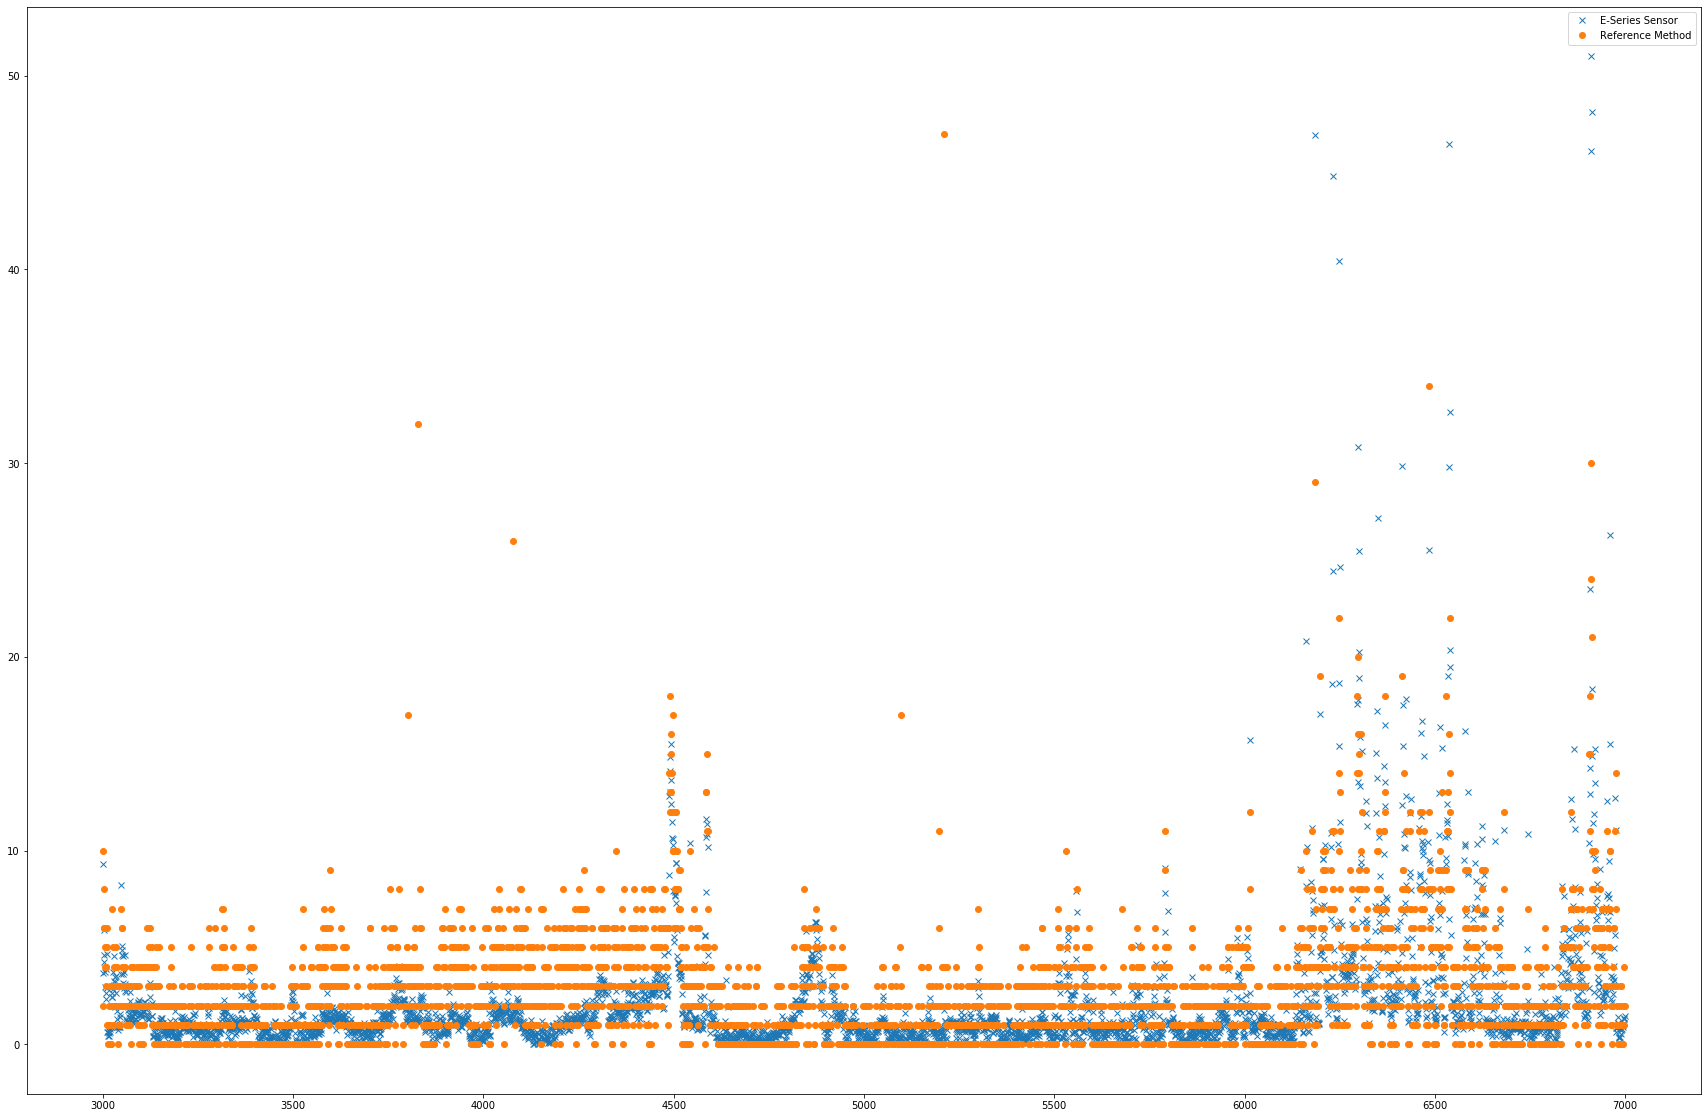

In [223]:
plt.figure(figsize=(30,20))
# Plot the low cost sensor data
plt.plot(hours[3000:7000], input_data[:,0][3000:7000],"x" , label="E-Series Sensor")
# Plot the reference sensor data
plt.plot(hours[3000:7000], ref_pm[3000:7000], "o", label="Reference Method")
plt.legend(loc="best")

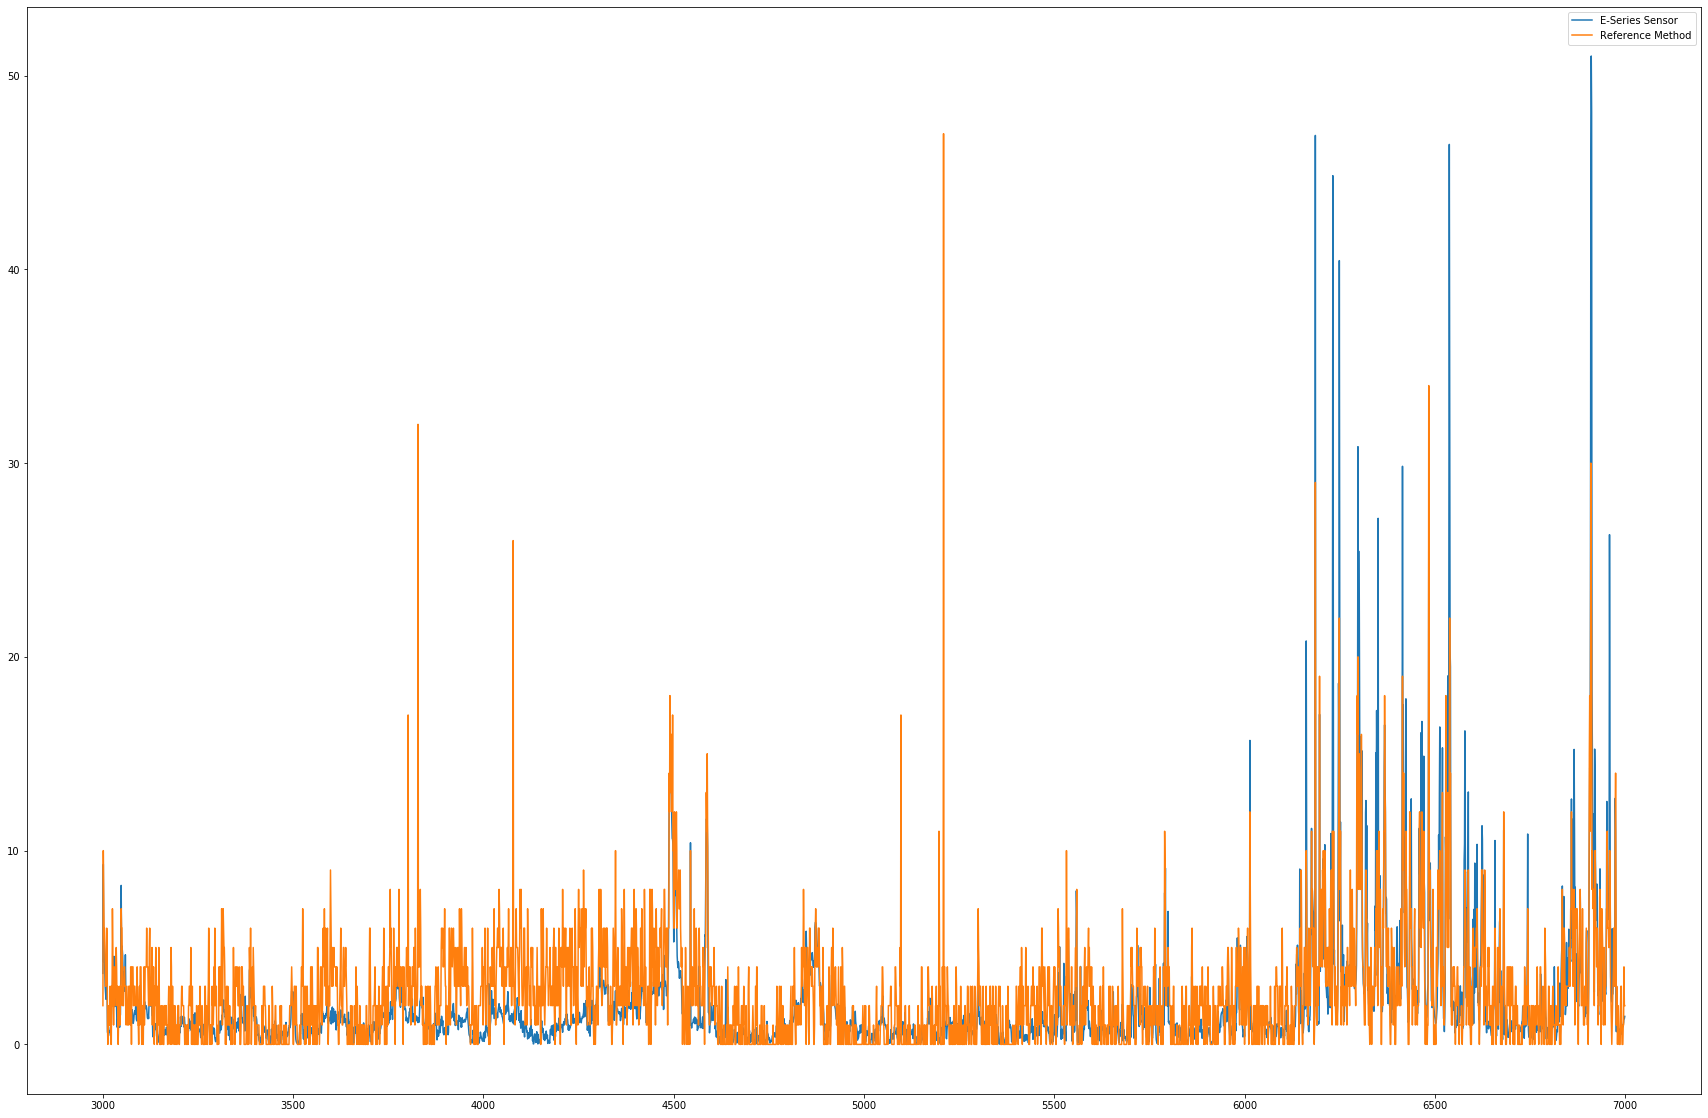

In [224]:
plt.figure(figsize=(30,20))
# Plot the low cost sensor data
plt.plot(hours[3000:7000], input_data[:,0][3000:7000], label="E-Series Sensor")
# Plot the reference sensor data
plt.plot(hours[3000:7000], ref_pm[3000:7000], label="Reference Method")
plt.legend(loc="best")

In [230]:
regr.predict(input_data)

array([1.01657303, 0.86712928, 0.77305269, ..., 3.03502666, 3.05977996,
       2.7491309 ])

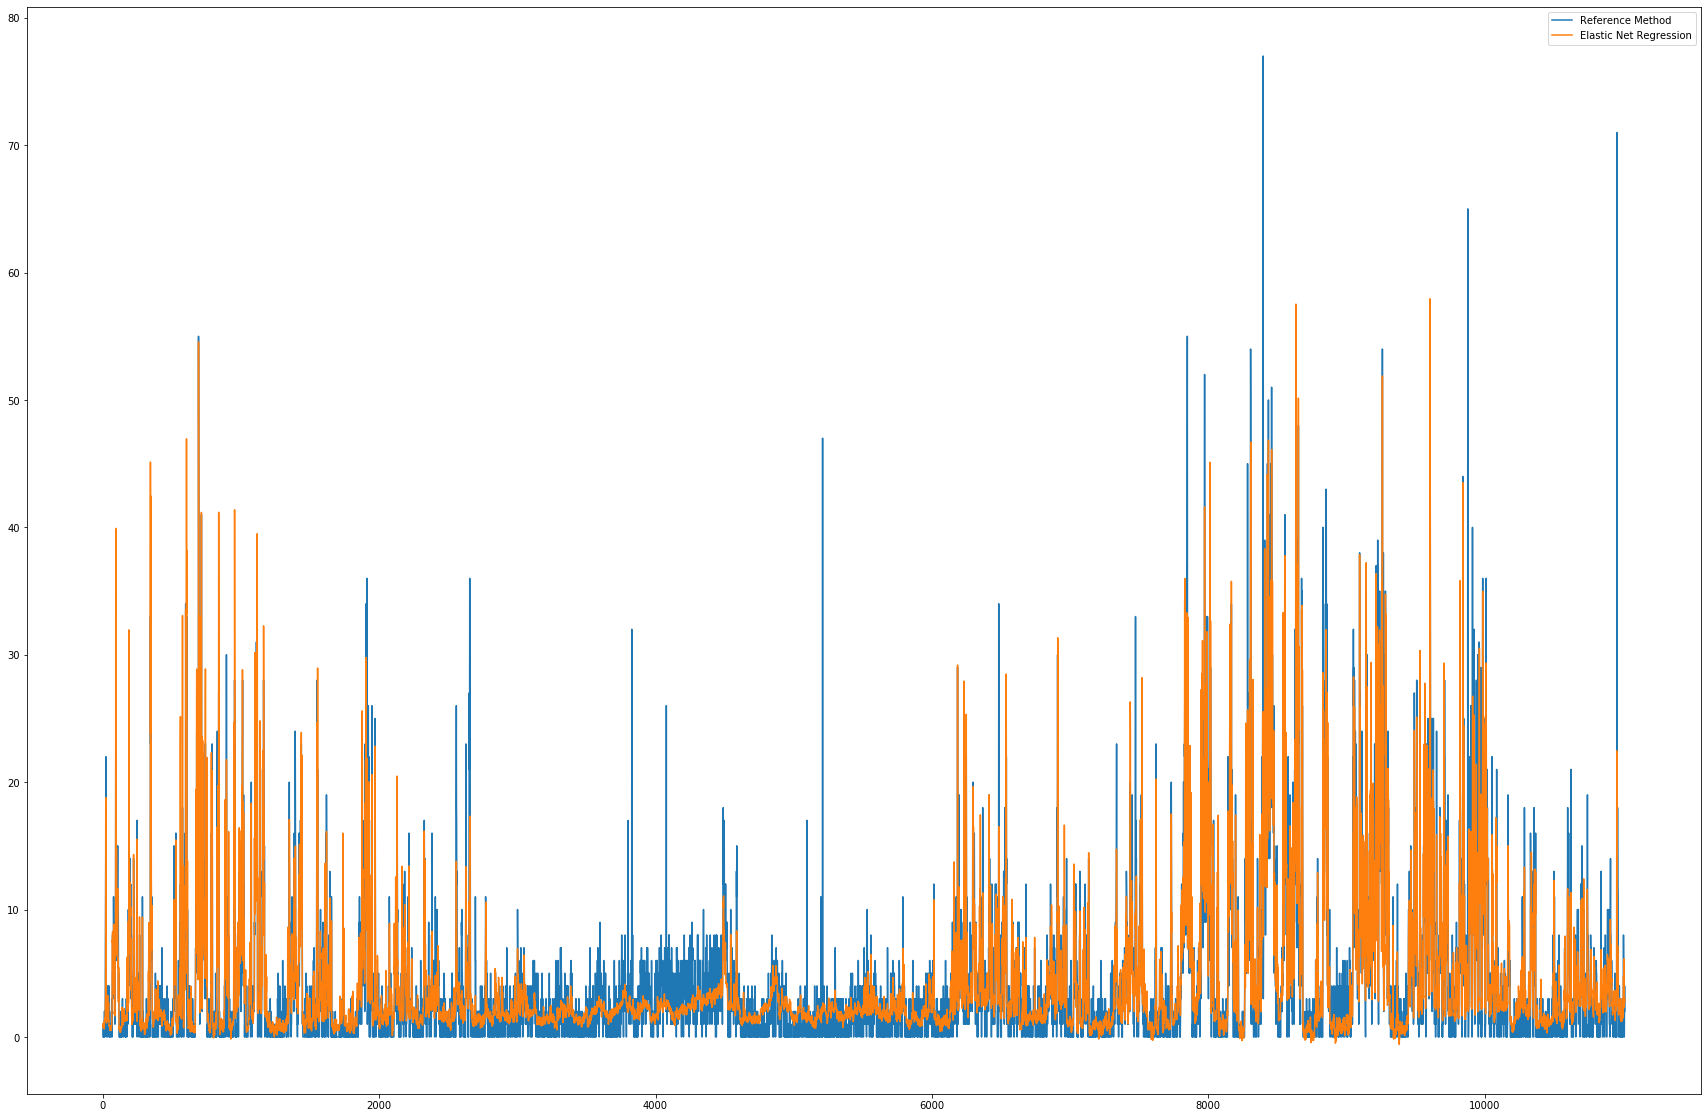

In [237]:
plt.figure(figsize=(30,20))
# ElasticNet regression prediction
# Plot the reference sensor data
plt.plot(hours, ref_pm, label="Reference Method")
plt.plot(hours, regr.predict(input_data), label="Elastic Net Regression")
plt.legend(loc="best")

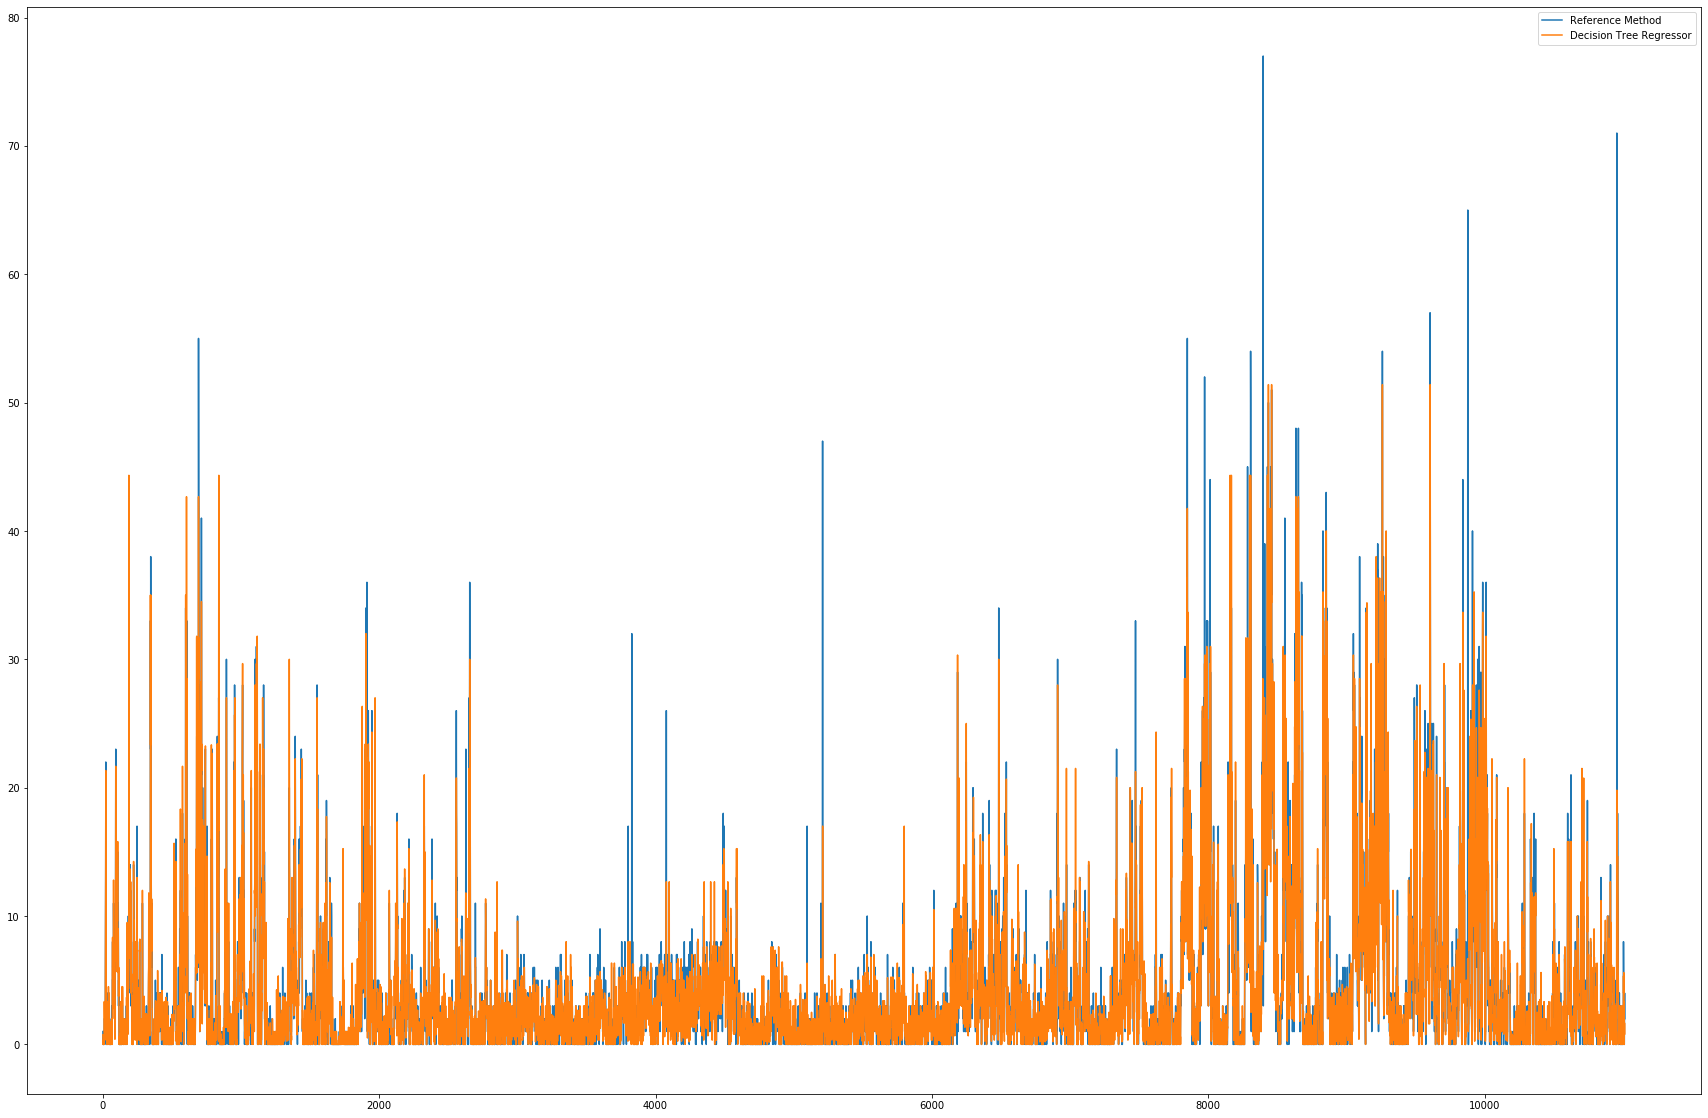

In [246]:
plt.figure(figsize=(30,20))
# ElasticNet regression prediction
# Plot the reference sensor data
plt.plot(hours, ref_pm, label="Reference Method")
plt.plot(hours, tree_regressor.predict(input_data), label="Decision Tree Regressor")
plt.legend(loc="best")

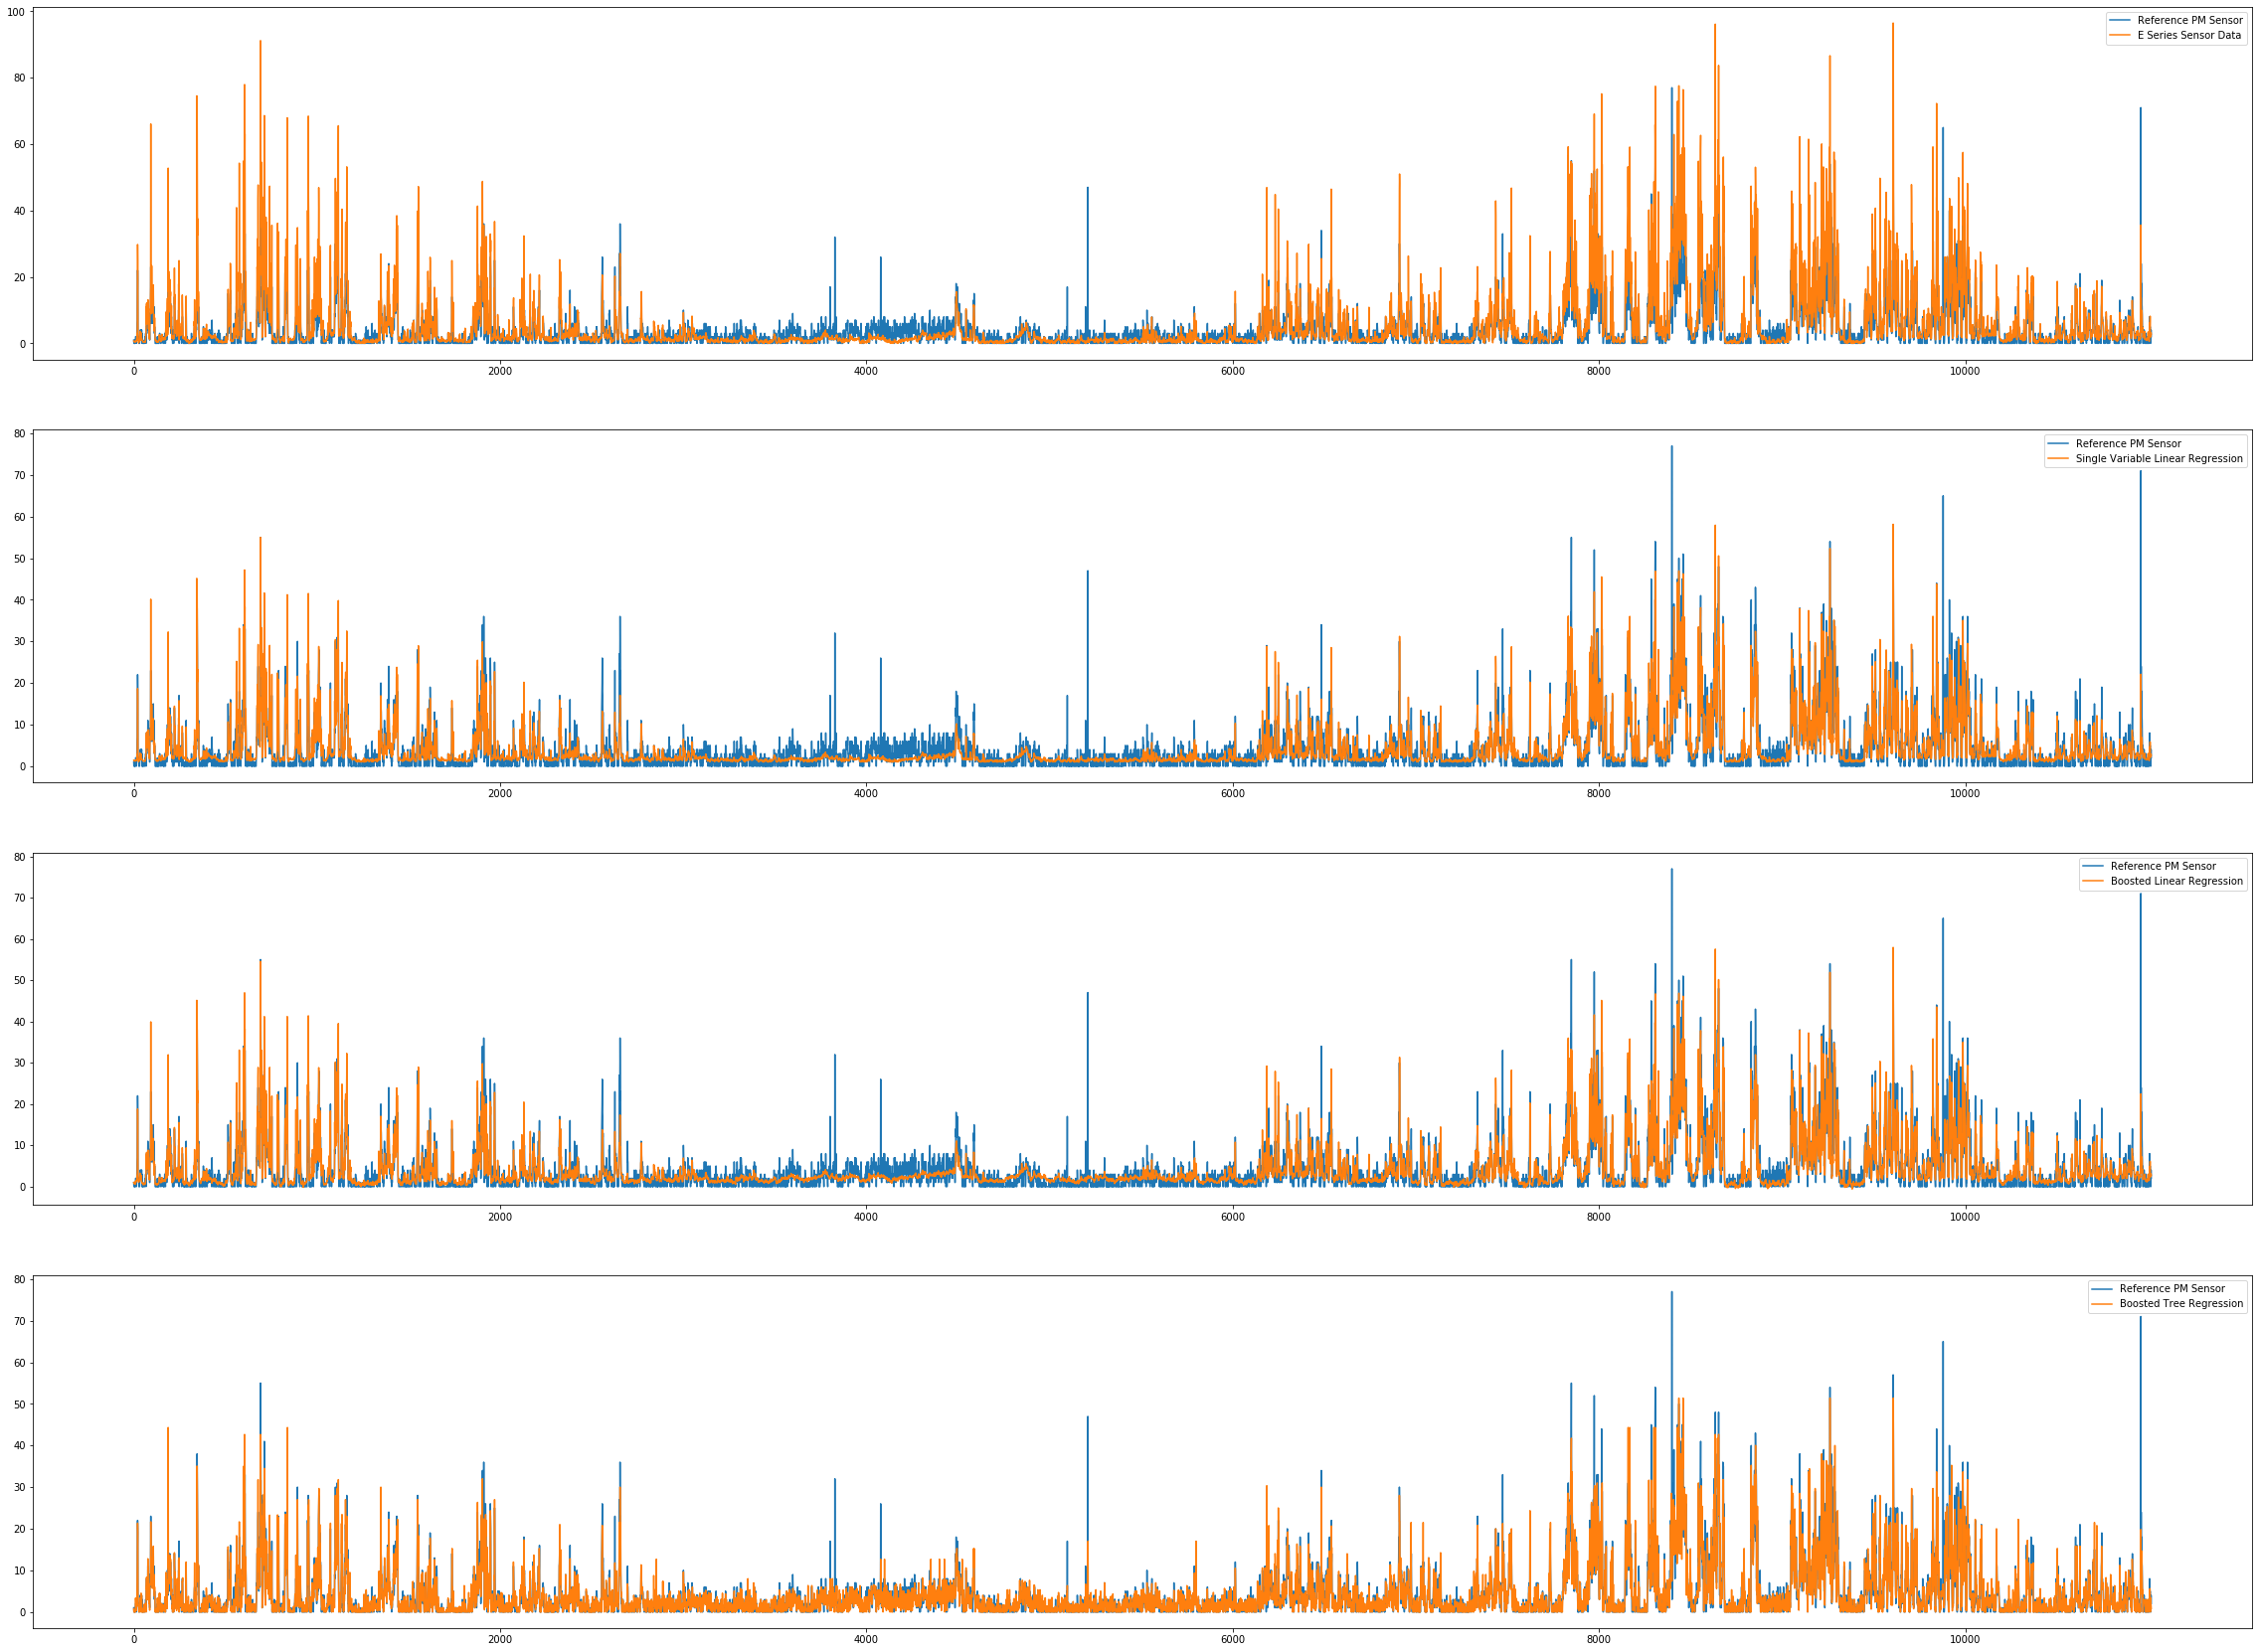

In [276]:
fig, axes = plt.subplots(4, figsize=(40, 30))
axes[0].plot(hours, ref_pm, label="Reference PM Sensor")
axes[0].plot(hours, input_data[:,0], label="E Series Sensor Data")
axes[0].legend(loc="best")

axes[1].plot(hours, ref_pm, label="Reference PM Sensor")
axes[1].plot(hours, lr.predict(input_data[:,0].reshape(-1,1)),'tab:orange', label="Single Variable Linear Regression")
axes[1].legend(loc="best")


axes[2].plot(hours, ref_pm, label="Reference PM Sensor")
axes[2].plot(hours, regr.predict(input_data),'tab:orange', label="Boosted Linear Regression")
axes[2].legend(loc="best")

axes[3].plot(hours, ref_pm, label="Reference PM Sensor")
axes[3].plot(hours, tree_regressor.predict(input_data),'tab:orange', label="Boosted Tree Regression")
axes[3].legend(loc="best")

In [322]:
print("Simple Linear Regression using low cost sensor PM data only...")
print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm, lr.predict(input_data[:,0].reshape(-1,1))))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm, lr.predict(input_data[:,0].reshape(-1,1)))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm, lr.predict(input_data[:,0].reshape(-1,1)))))
print('Estimator feature strengths: {}'.format(lr.coef_))

Simple Linear Regression using low cost sensor PM data only...
RMSE: 2.6683
MAE: 1.7153
R2: 0.8147
Estimator feature strengths: [0.59214595]


In [323]:
print("Boosted Linear Regression using all the features...")
print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm, regr.predict(input_data)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm, regr.predict(input_data))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm, regr.predict(input_data))))
print('Estimator feature strengths: {}'.format(regr.coef_))

Boosted Linear Regression using all the features...
RMSE: 2.6292
MAE: 1.6584
R2: 0.8201
Estimator feature strengths: [ 0.58807596  0.02658985 -0.00629758  0.0079831  -0.30486499]


In [326]:
print("Boosted Regression Tree using all the features...")
print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm, tree_regressor.predict(input_data)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm, tree_regressor.predict(input_data))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm, tree_regressor.predict(input_data))))
print('Estimator feature strengths: {}'.format(tree_regressor.feature_importances_))

Boosted Regression Tree using all the features...
RMSE: 2.3709
MAE: 1.3891
R2: 0.8537
Estimator feature strengths: [0.94125582 0.02155799 0.01202427 0.01064975 0.01451216]


In [335]:
# Decision tree regression method
input_data_train, input_data_test, ref_pm_train, ref_pm_test = train_test_split(input_data[:len(input_data)//2], ref_pm[:len(ref_pm)//2], random_state=0)
tree_regressor = DecisionTreeRegressor(max_depth=None, min_samples_leaf=8).fit(input_data_train, ref_pm_train)
print("Training set score: {:0.4f}".format(tree_regressor.score(input_data_train, ref_pm_train)))
print("Test set score: {:0.4f}".format(tree_regressor.score(input_data_test, ref_pm_test)))

Training set score: 0.8513
Test set score: 0.7166


In [336]:
print("Boosted Regression Tree using all the features...")
print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm, tree_regressor.predict(input_data)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm, tree_regressor.predict(input_data))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm, tree_regressor.predict(input_data))))
print('Estimator feature strengths: {}'.format(tree_regressor.feature_importances_))

Boosted Regression Tree using all the features...
RMSE: 2.7632
MAE: 1.6624
R2: 0.8012
Estimator feature strengths: [0.89294902 0.05757388 0.0129759  0.01617444 0.02032676]


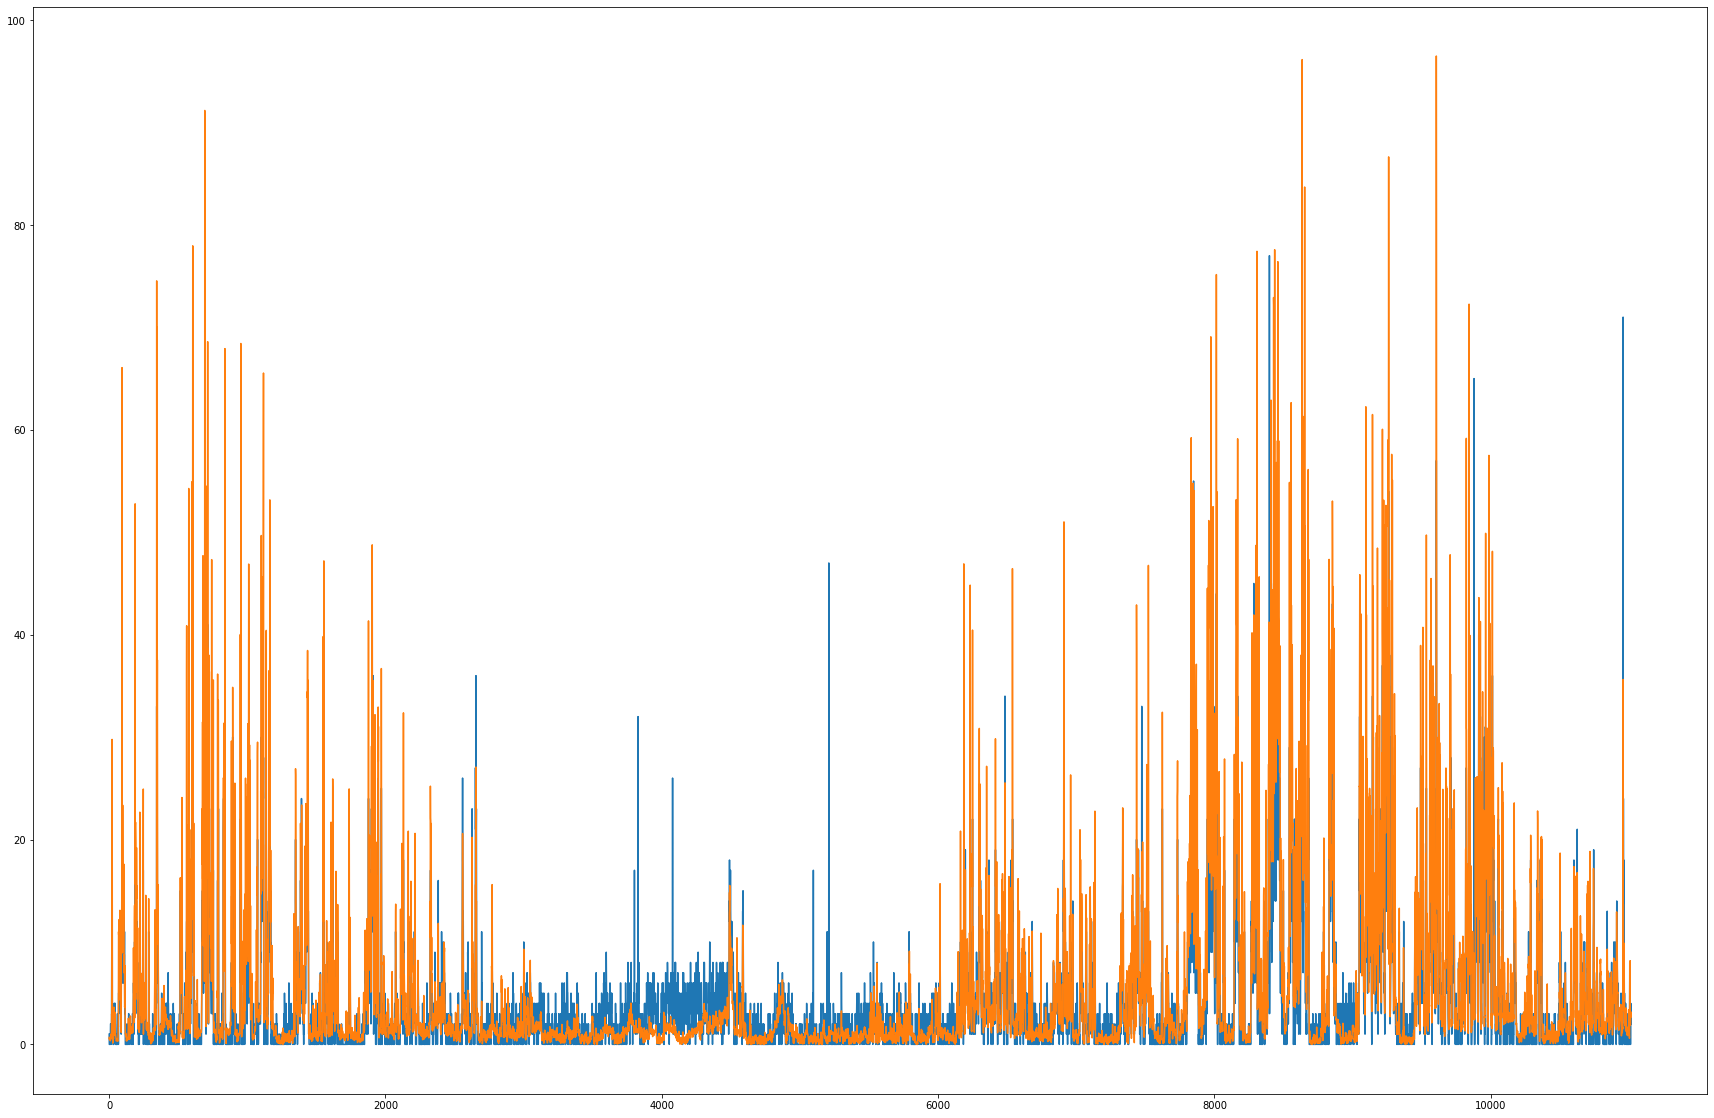

In [341]:
plt.figure(figsize=(30, 20))
plt.plot(hours, ref_pm)
plt.plot(hours, input_data[:,0])

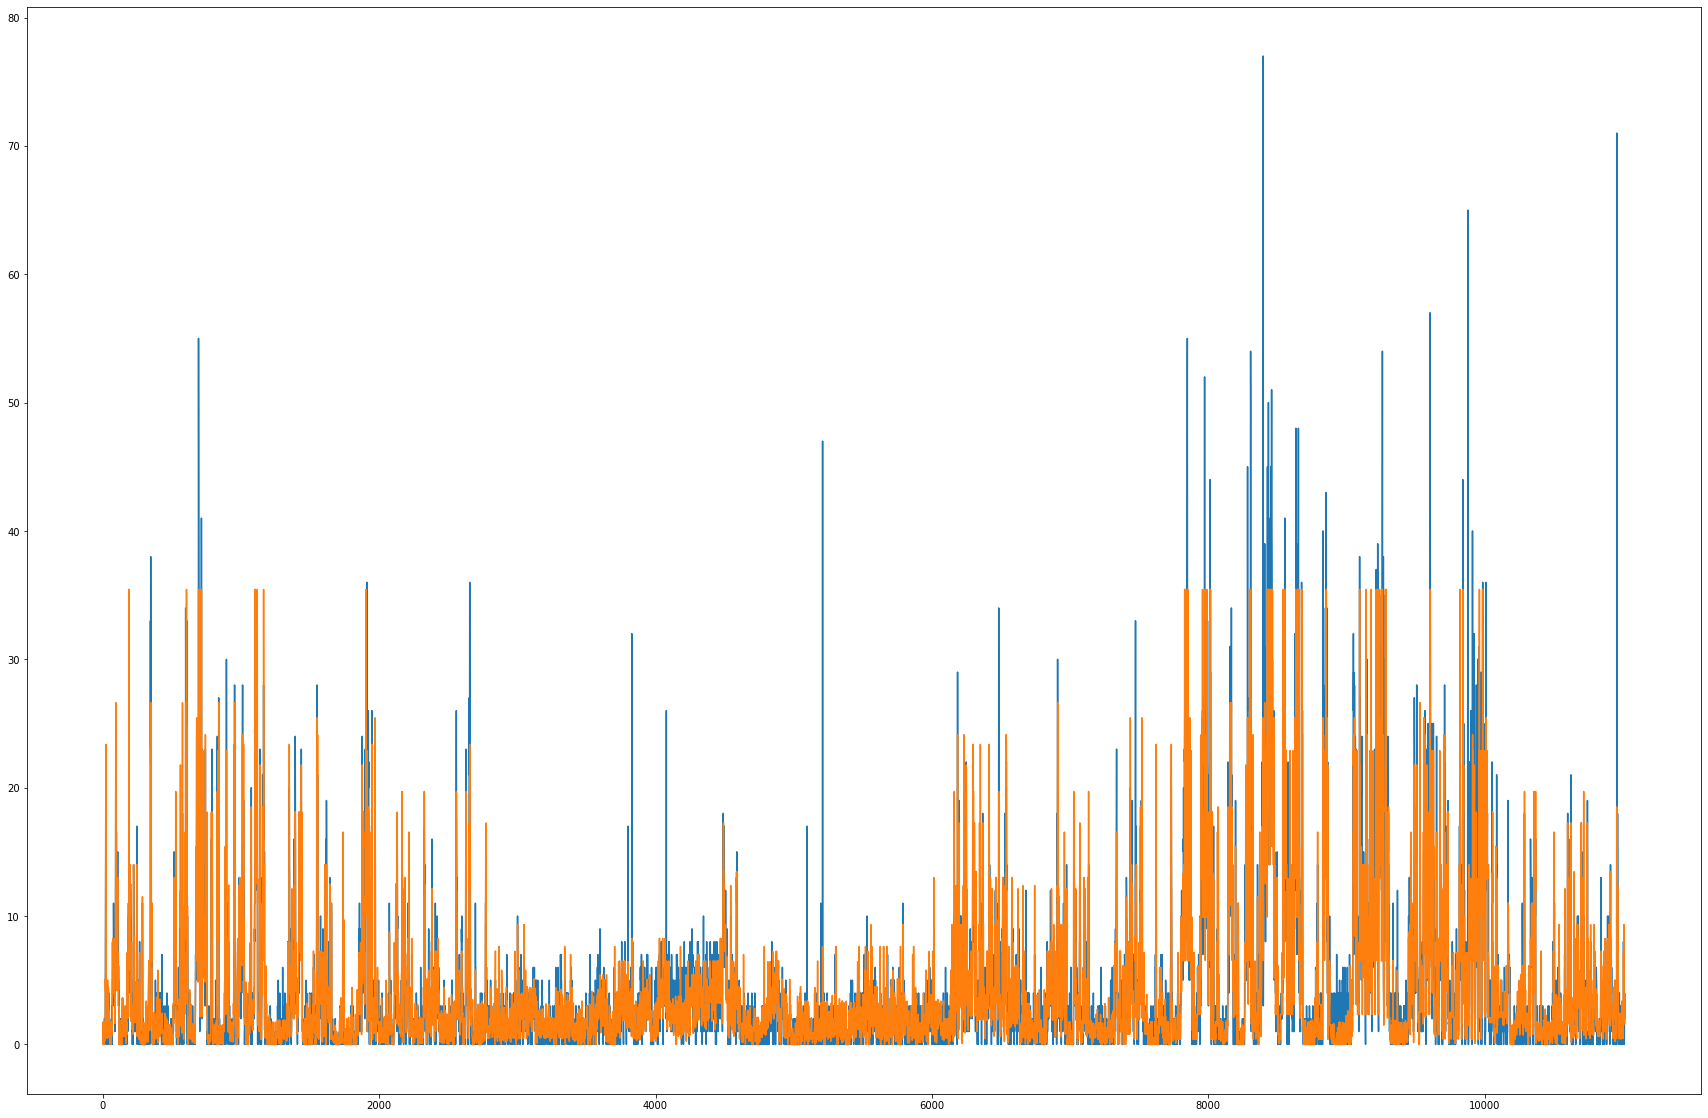

In [340]:
plt.figure(figsize=(30, 20))
plt.plot(hours, ref_pm)
plt.plot(hours, tree_regressor.predict(input_data))